In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

client = MongoClient('localhost:27017')
db = client.hiwi
collection = db.production_steps
data_temp = list(collection.find({"features": {"$exists": True}}))
data = pd.DataFrame(data_temp)

database = {}
database['conditioning_features'] = {}
index = []

for k in range(2):
    database['conditioning_features'][str(k)] = {}
    database['conditioning_features']['0']['conditioning_0_step_1_mean_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_r_dc_step'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_r_dc'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_energy'] = []

for i in range(len(data_temp)):
    if data_temp[i]["cell_id"] != "Q_206":
        if data_temp[i]['substep'] == "cycle_0_step_1":
            database['conditioning_features']['0']['conditioning_0_step_1_mean_voltage'].append((data_temp[i]['features'][0]['value']))
            index.append(data_temp[i]['cell_id'])
        if data_temp[i]['substep'] == "cycle_0_step_3":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_3_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_3_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_3_energy'].append((data_temp[i]['features'][2]['value']))
            if data_temp[i]['features'][3]['type'] == "r_dc_step":
                database['conditioning_features']['0']['conditioning_0_step_3_r_dc_step'].append((data_temp[i]['features'][3]['value']))
            if data_temp[i]['features'][4]['type'] == "r_dc":
                database['conditioning_features']['0']['conditioning_0_step_3_r_dc'].append((data_temp[i]['features'][4]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_4":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_4_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_4_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_4_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_5":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_5_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_5_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_5_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_6":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_6_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_6_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_6_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_3":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_3_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_3_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_3_energy'].append((data_temp[i]['features'][2]['value']))
            if data_temp[i]['features'][3]['type'] == "r_dc_step":
                database['conditioning_features']['1']['conditioning_1_step_3_r_dc_step'].append((data_temp[i]['features'][3]['value']))
            if data_temp[i]['features'][4]['type'] == "r_dc":
                database['conditioning_features']['1']['conditioning_1_step_3_r_dc'].append((data_temp[i]['features'][4]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_4":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_4_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_4_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_4_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_5":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_5_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_5_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_5_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_6":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_6_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_6_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_6_energy'].append((data_temp[i]['features'][2]['value']))


data_0 = pd.DataFrame(database['conditioning_features']['0'])
data_1 = pd.DataFrame(database['conditioning_features']['1'])

data = pd.concat([data_0, data_1], axis=1, join='inner')

data['index'] = index
data = data.sort_values(by = ['index'])
data = data.drop(['index'], axis = 1)

labels = pd.read_csv("/Users/rampageyao/Desktop/data-meet-master/app/data/4_raw_q/labels.csv", delimiter=";")
labels = (labels.iloc[:, 1]).tolist()
data['qdot_labels'] = labels


Text(0, 0.5, 'Cumulative Explained Variance')

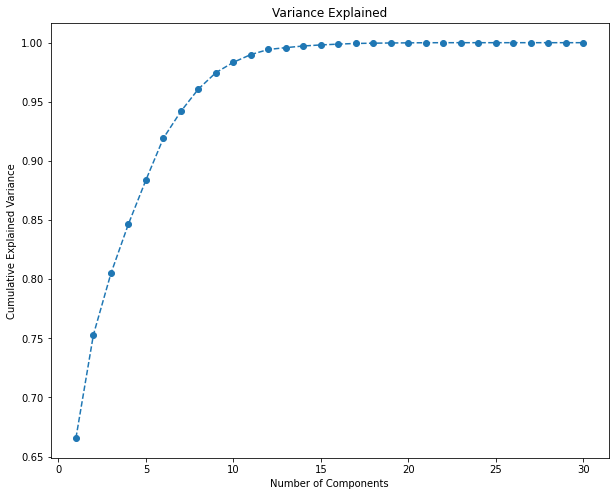

In [3]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# select number of components that VAR higher than 0.8

In [4]:
# from above we select 3
pca = PCA(n_components=3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

data_pca = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
data = data_pca[['Component 1', 'Component 2', 'Component 3']]
data.head()
# now we have new representation of all original features, they are highly abstract and not correlated to each other

,Component 1,Component 2,Component 3
0,1.611194,0.656468,-2.209993
1,-1.921039,1.591312,-1.665195
2,0.036173,1.569200,-1.269359
3,0.597200,0.312625,-1.860864
4,-2.614709,-0.112586,-1.605173


Text(0, 0.5, 'WCSS')

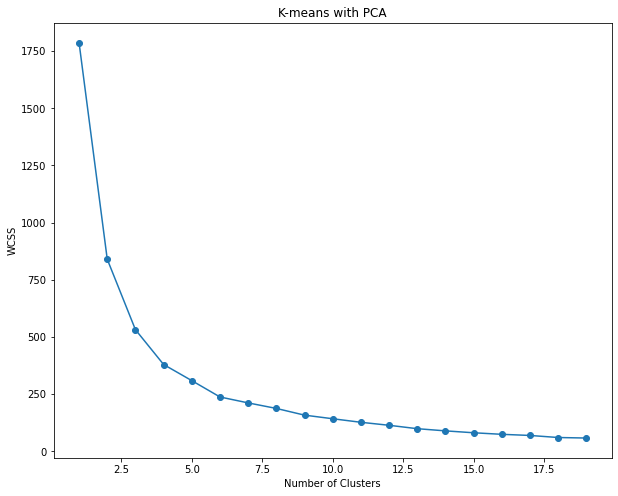

In [5]:
wcss = []
for i in range(1,20): # grid search, assume we have 1 or 2 or 3 ... or 20 clusters/patterns
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,20), wcss, marker='o', linestyle='-')
plt.title('K-means with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [6]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

data['Segment K-means PCA'] = kmeans_pca.labels_
data.head()

<ipython-input-6-4002a10f5477>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment K-means PCA'] = kmeans_pca.labels_


,Component 1,Component 2,Component 3,Segment K-means PCA
0,1.611194,0.656468,-2.209993,0
1,-1.921039,1.591312,-1.665195,4
2,0.036173,1.569200,-1.269359,0
3,0.597200,0.312625,-1.860864,0
4,-2.614709,-0.112586,-1.605173,4


<ipython-input-7-32b8e1dee593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment'] = data['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})
/Users/rampageyao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


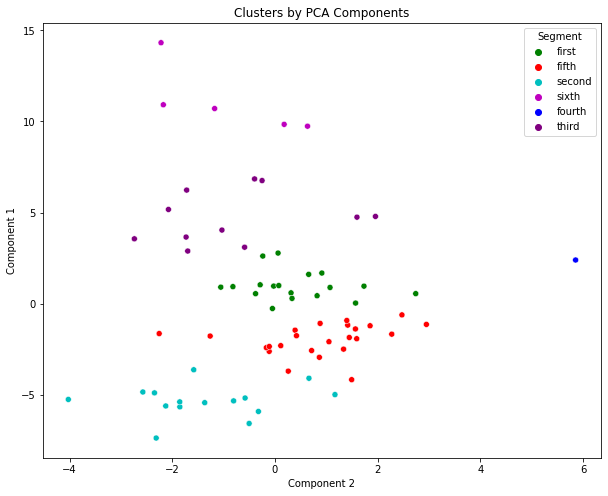

In [7]:
data['Segment'] = data['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})
x_axis = data['Component 2']
y_axis = data['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = data['Segment'], palette = ['g','r','c','m','b','purple'])
plt.title('Clusters by PCA Components')
plt.show()

In [8]:
crino = {'index': index, 'label': kmeans_pca.labels_}
crino = pd.DataFrame(crino, columns = ['index','label'])
crino = crino.sort_values(by = ['index'])
crino.to_csv('Conditioning_PCA_Kmeans_label.csv') 
crino.head()

,index,label
72,Q_162,2
16,Q_163,4
21,Q_164,4
8,Q_165,0
40,Q_168,4


In [9]:
label = crino['label'].tolist()
class_0, class_1, class_2, class_3, class_4, class_5 = [], [], [], [], [], []

for i in range(len(label)):
    if label[i] == 0:
        class_0.append(index[i])
    if label[i] == 1:
        class_1.append(index[i])
    if label[i] == 2:
        class_2.append(index[i])
    if label[i] == 3:
        class_3.append(index[i])
    if label[i] == 4:
        class_4.append(index[i])
    if label[i] == 5:
        class_5.append(index[i])
print('class_0:', class_0)
print('\n')
print('class_1:',class_1)
print('\n')
print('class_2:',class_2)
print('\n')
print('class_3:',class_3)
print('\n')
print('class_4:',class_4)
print('\n')
print('class_5:',class_5)

class_0: ['Q_197', 'Q_198', 'Q_200', 'Q_187', 'Q_240', 'Q_210', 'Q_220', 'Q_186', 'Q_199', 'Q_192', 'Q_223', 'Q_237', 'Q_216', 'Q_249', 'Q_177', 'Q_222', 'Q_217', 'Q_194']
class_1: ['Q_193', 'Q_189', 'Q_182', 'Q_183', 'Q_250', 'Q_233', 'Q_242', 'Q_227', 'Q_202', 'Q_207', 'Q_179', 'Q_172', 'Q_190', 'Q_176', 'Q_248']
class_2: ['Q_188', 'Q_175', 'Q_164', 'Q_205', 'Q_241', 'Q_209', 'Q_185', 'Q_238', 'Q_201', 'Q_208', 'Q_184']
class_3: ['Q_229']
class_4: ['Q_214', 'Q_235', 'Q_171', 'Q_204', 'Q_221', 'Q_244', 'Q_163', 'Q_170', 'Q_245', 'Q_224', 'Q_174', 'Q_246', 'Q_181', 'Q_173', 'Q_195', 'Q_168', 'Q_191', 'Q_219', 'Q_180', 'Q_236', 'Q_232', 'Q_239', 'Q_243', 'Q_162']
class_5: ['Q_165', 'Q_234', 'Q_247', 'Q_169', 'Q_213']


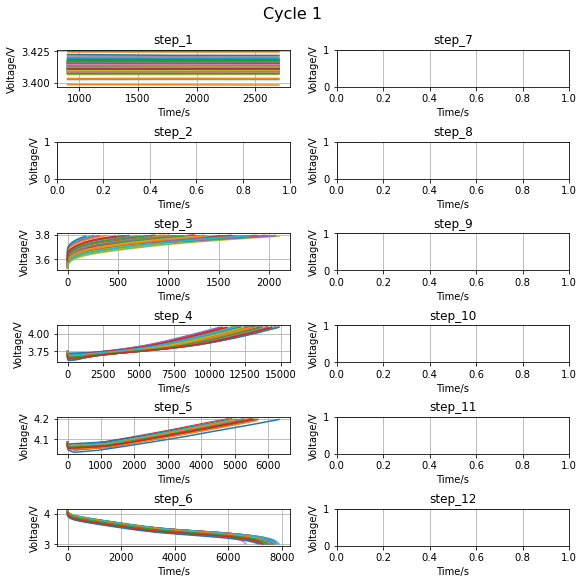

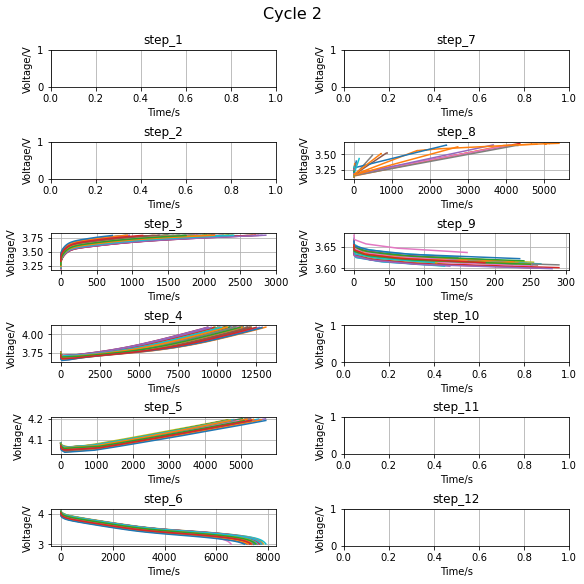

In [10]:
def plot2():
    client = MongoClient('localhost:27017')
    db = client.hiwi

    step_names = ["step_1", "step_2", "step_3", "step_4", "step_5", "step_6",
                "step_7", "step_8", "step_9", "step_10", "step_11"]

    num_cols = 2
    num_rows = 6

    for idx in range(2):
        fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows,
                                constrained_layout=True, figsize=(8, 8))
        fig.suptitle(f'Cycle {idx+1}', fontsize=16)

        for col in range(num_cols):
            for row in range(num_rows):
                axs[row, col].set_xlabel('Time/s')
                axs[row, col].set_ylabel('Voltage/V')
                axs[row, col].grid()
                axs[row, col].set_title('step_'+str(num_rows*col+row+1))

        for col in range(num_cols):
            for row in range(num_rows):
                if num_rows*col+row+1 >= 11:
                    continue
                else:
                    step_data = list(db.production_steps.find({"substep": "cycle_"+str(idx)+"_step_"+str(num_rows*col+row+1)}))
                    for i in range(len(step_data)):
                        if step_data[i]["readings"] != []:
                            df = pd.DataFrame(step_data[i]["readings"])
                            axs[row, col].plot(df.step_time.values, df.voltage_value.values)

    plt.show()

plot2()

In [11]:
def plot2_class(class_i):
    client = MongoClient('localhost:27017')
    db = client.hiwi

    step_names = ["step_1", "step_2", "step_3", "step_4", "step_5", "step_6",
                "step_7", "step_8", "step_9", "step_10", "step_11"]

    num_cols = 2
    num_rows = 6

    for idx in range(2):
        fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows,
                                constrained_layout=True, figsize=(8, 8))
        fig.suptitle(f'Cycle {idx+1}', fontsize=16)

        for col in range(num_cols):
            for row in range(num_rows):
                axs[row, col].set_xlabel('Time/s')
                axs[row, col].set_ylabel('Voltage/V')
                axs[row, col].grid()
                axs[row, col].set_title('step_'+str(num_rows*col+row+1))

        for col in range(num_cols):
            for row in range(num_rows):
                if num_rows*col+row+1 >= 11:
                    continue
                else:
                    step_data = list(db.production_steps.find({"substep": "cycle_"+str(idx)+"_step_"+str(num_rows*col+row+1)}))
                    for i in range(len(step_data)):
                        if step_data[i]["readings"] != [] and step_data[i]["cell_id"] in class_i:
                            df = pd.DataFrame(step_data[i]["readings"])
                            axs[row, col].plot(df.step_time.values, df.voltage_value.values)

    plt.show()



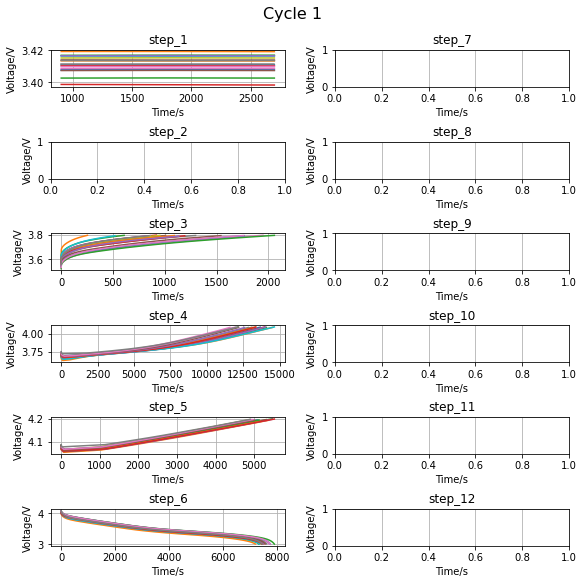

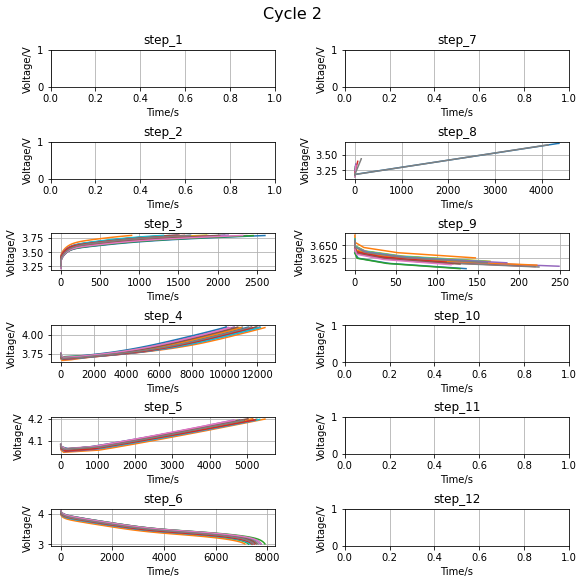

In [12]:
plot2_class(class_0)

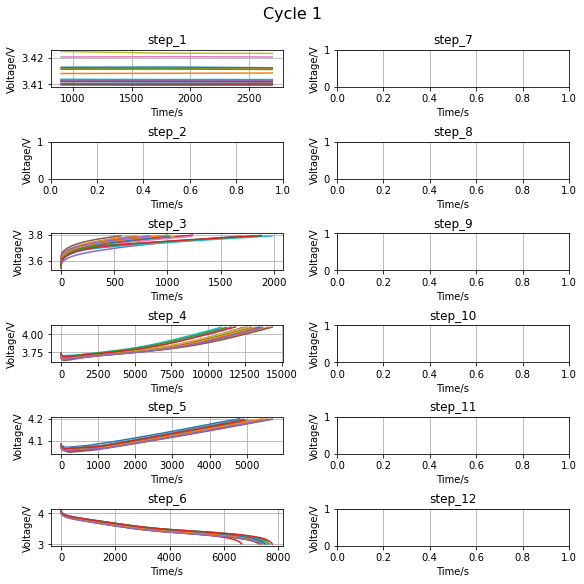

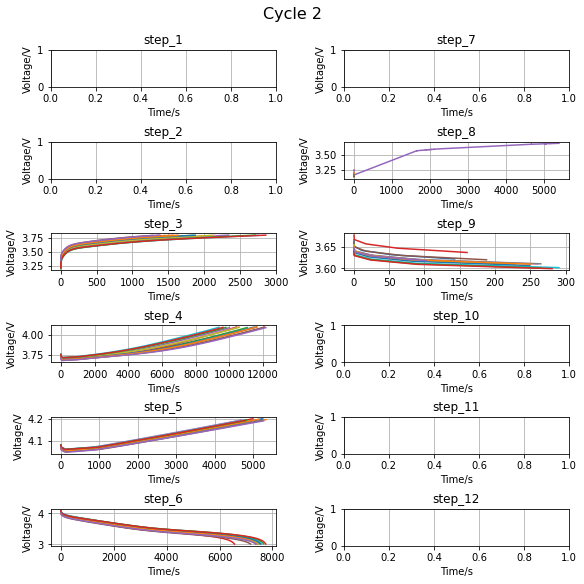

In [13]:
plot2_class(class_1)

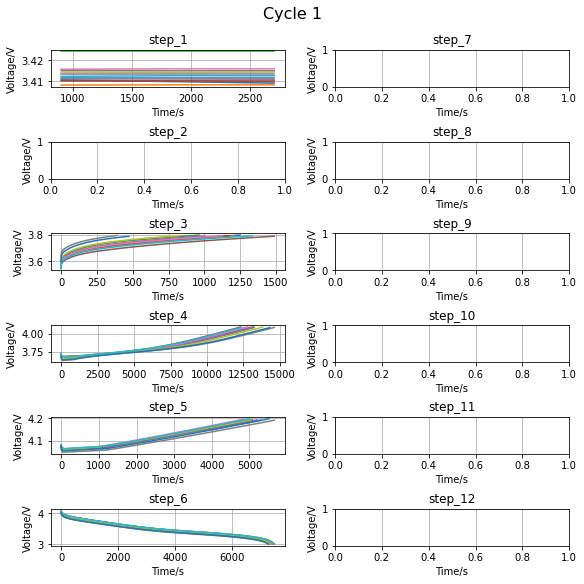

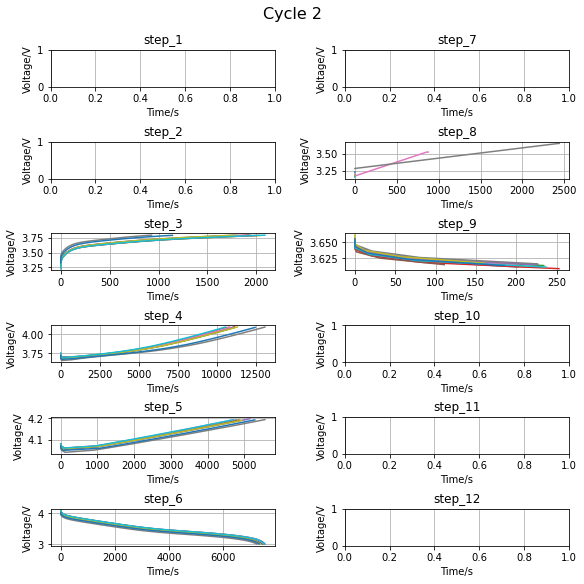

In [14]:
plot2_class(class_2)

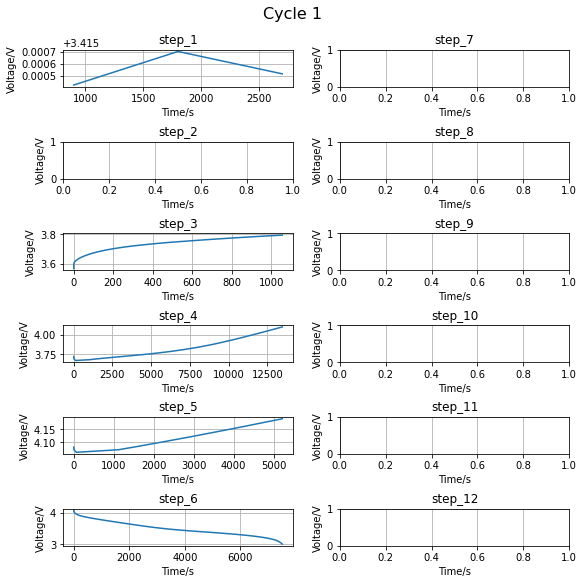

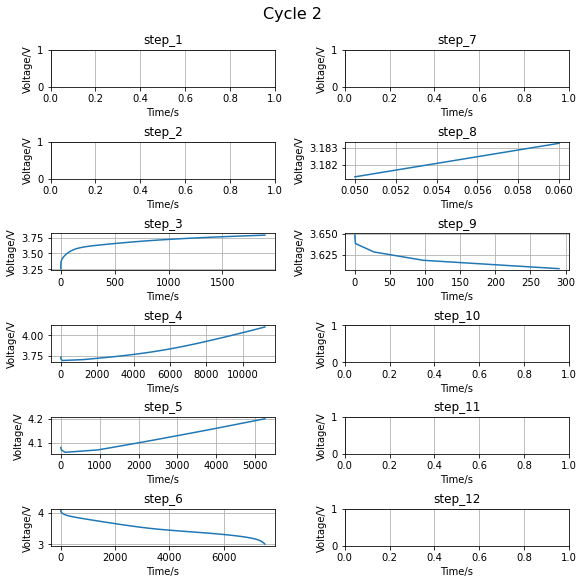

In [15]:
plot2_class(class_3)

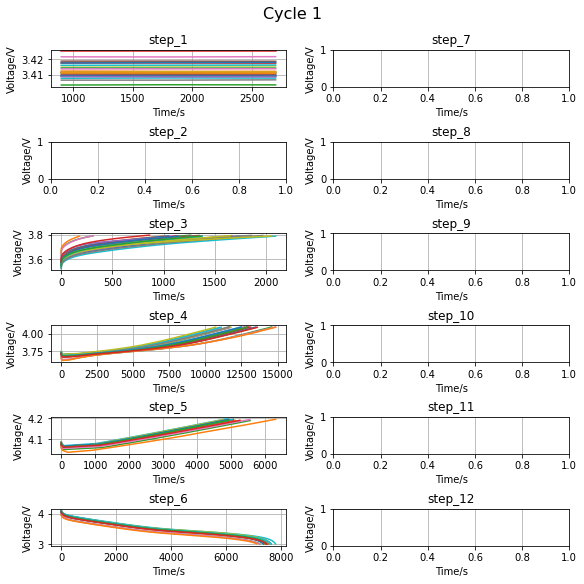

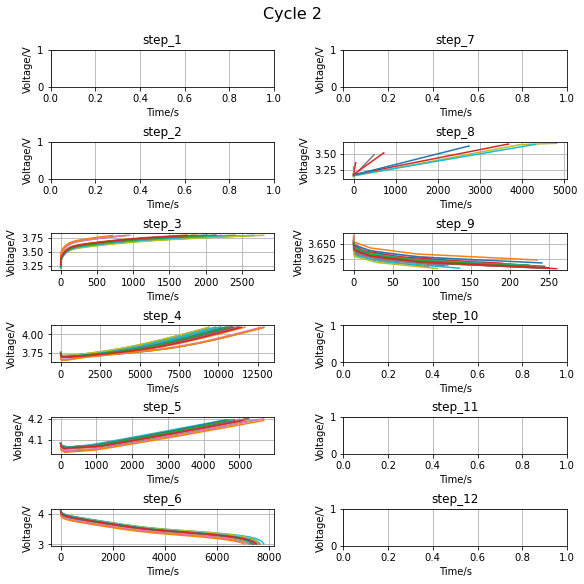

In [16]:
plot2_class(class_4)

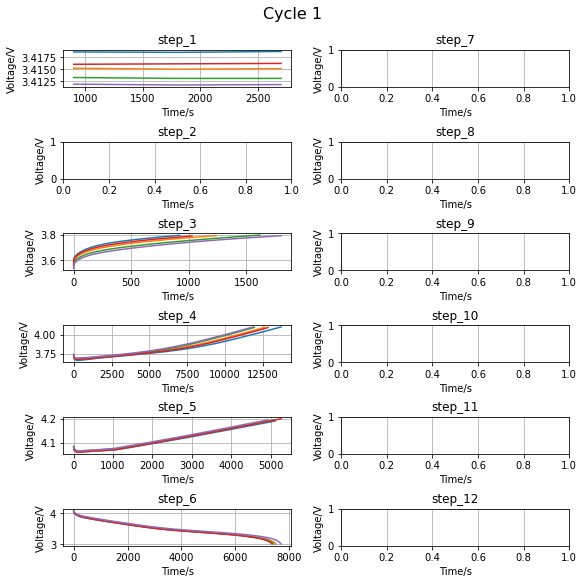

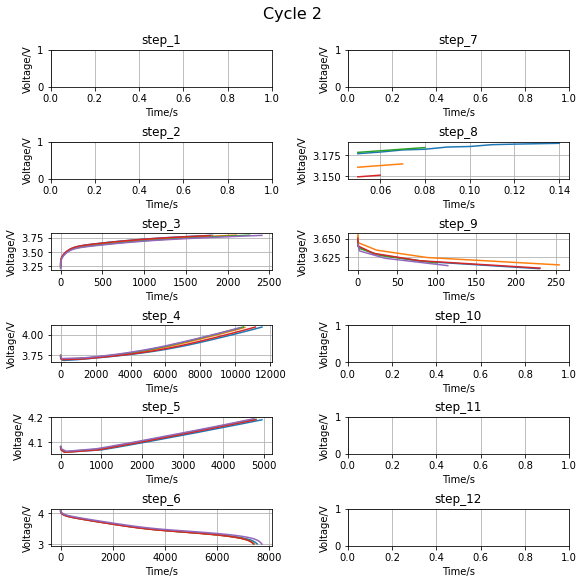

In [17]:
plot2_class(class_5)